#Assignment 1
##1. Use the use case in the class (DL_Lesson_1.ipynb & diabetes.csv):

In [21]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
#checking tensor flow version
print(tf.__version__)

2.8.0


In [23]:
# importing dataset
dataset = pd.read_csv("/content/sample_data/diabetes.csv")

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
# getting numpy ndarray from dataset
dataset = dataset.values
dataset

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 3.51e-01, 3.10e+01, 0.00e+00],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 6.72e-01, 3.20e+01, 1.00e+00],
       [1.00e+00, 8.90e+01, 6.60e+01, ..., 1.67e-01, 2.10e+01, 0.00e+00],
       ...,
       [5.00e+00, 1.21e+02, 7.20e+01, ..., 2.45e-01, 3.00e+01, 0.00e+00],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.49e-01, 4.70e+01, 1.00e+00],
       [1.00e+00, 9.30e+01, 7.00e+01, ..., 3.15e-01, 2.30e+01, 0.00e+00]])

In [26]:
# checking dataset shape
dataset.shape

(767, 9)

In [27]:
# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)

In [28]:
# splitting train and test data
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.25, random_state=42)

In [29]:
# fitting train data and transforming
X_train_fit = sc.fit(X_train)
X_train_tra = sc.transform(X_train)
# fitting test data and transforming
X_test_fit = sc.fit(X_test)
X_test_tra = sc.transform(X_test)

In [30]:
# checking train data shape
print(X_train.shape)

(575, 8)


## a. Add more Dense layers to the existing code and check how the accuracy changes.

In [31]:
model = keras.Sequential() # create model
model.add(layers.Dense(32, input_dim=8, activation='relu')) # Input layer
model.add(layers.Dense(64, activation='relu')) # hidden layer 1
model.add(layers.Dense(128, activation='relu')) # hidden layer 2
model.add(layers.Dense(1, activation='sigmoid')) # output layer
# compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# printing a summary about layer and output shap with param number
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                288       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,849
Trainable params: 10,849
Non-trainable params: 0
_________________________________________________________________


In [32]:
# fitting model without validation
my_first_nn_fitted = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 1.9853 - accuracy: 0.5513
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.8303 - accuracy: 0.6226
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7308 - accuracy: 0.5843
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7286 - accuracy: 0.6417
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6601 - accuracy: 0.6487
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6819 - accuracy: 0.6835
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6202 - accuracy: 0.6904
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.6643
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6030 - accuracy: 0.6957
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 0.7116 - accuracy: 0.6609
Epoch 11/

In [33]:
# getting test score from data without normalization and print
scores = model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 6ms/step - loss: 0.5729 - accuracy: 0.7396


In [34]:
print(scores)

[0.5728620886802673, 0.7395833134651184]


## b. Add the validation_data=(X_test, Y_test) attribute to .fit() method.

In [35]:
# fitting model and validating with test data
nn_fitted = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), shuffle=True)

Epoch 1/100
18/18 [==============================] - 0s 15ms/step - loss: 0.4116 - accuracy: 0.7948 - val_loss: 0.6418 - val_accuracy: 0.7448
Epoch 2/100
18/18 [==============================] - 0s 14ms/step - loss: 0.4139 - accuracy: 0.8104 - val_loss: 0.6246 - val_accuracy: 0.7292
Epoch 3/100
18/18 [==============================] - 0s 14ms/step - loss: 0.4112 - accuracy: 0.8122 - val_loss: 0.5359 - val_accuracy: 0.7552
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 0.4417 - accuracy: 0.7757 - val_loss: 0.5597 - val_accuracy: 0.7344
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 0.4119 - accuracy: 0.7965 - val_loss: 0.5430 - val_accuracy: 0.7552
Epoch 6/100
18/18 [==============================] - 0s 11ms/step - loss: 0.4193 - accuracy: 0.8139 - val_loss: 0.5805 - val_accuracy: 0.7500
Epoch 7/100
18/18 [==============================] - 0s 10ms/step - loss: 0.4332 - accuracy: 0.7878 - val_loss: 0.6142 - val_accuracy: 0.7240
Epoch 

## c. Plot the accuracy for training and validation (one plot for both: train and test accuracy).

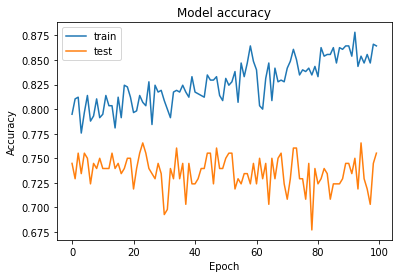

In [36]:
# plotting history for accuracy
import matplotlib.pyplot as plt
# plot the accurcy
plt.plot(nn_fitted.history['accuracy'])
# plot the val
plt.plot(nn_fitted.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## d. Plot the loss for training and validation (one plot for both: train and test loss).

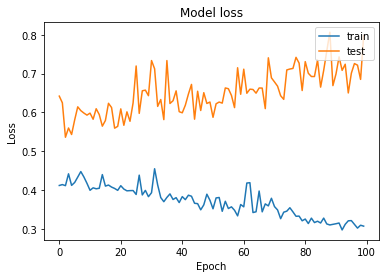

In [37]:
# plotting history for loss
plt.plot(nn_fitted.history['loss'])
# plot the val of loss
plt.plot(nn_fitted.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [38]:
# getting test score from data before normalization and print
scores_test = model.evaluate(X_test, Y_test)
print(f'Loss score for test data: {scores_test}')

6/6 [==============================] - 0s 3ms/step - loss: 0.7976 - accuracy: 0.7552
Loss score for test data: [0.7975821495056152, 0.7552083134651184]


## e. Normalize the data before feeding to the model and check how the normalization changes your accuracy sue the StandardScaler() from scikit learn.

In [39]:
# splitting train and test data from normalized dataset
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data[:,0:8], scaled_data[:,8], test_size=0.25, random_state=42)

In [40]:
# getting test score from data after normalization and print
scores_test = model.evaluate(X_test, Y_test)
print(f'Loss score for test data: {scores_test}')

6/6 [==============================] - 0s 3ms/step - loss: 0.1111 - accuracy: 0.0000e+00
Loss score for test data: [0.11107277870178223, 0.0]
